In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
train = pd.read_csv('./galaxy-zoo-data/training_solutions_rev1.csv')
train

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [3]:
df_temp = train.sort_values('Class1.1',axis=0, ascending=False)
f1 = df_temp['GalaxyID'][0:100]
df_temp = train.sort_values('Class1.2',axis=0, ascending=False)
f2 = df_temp['GalaxyID'][0:100]
df_temp = train.sort_values('Class1.3',axis=0, ascending=False)
f3 = df_temp['GalaxyID'][0:100]

In [7]:
def buildim(arr,val_break): # pour avoir les x premiéres de chaques classes
    i =1
    plt.figure(figsize=(20,100))
    
    for id_f in arr:
        image = cv2.imread(f'./galaxy-zoo-data/images_training_rev1/{id_f}.jpg')
        img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.subplot(1, val_break, i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i >= (val_break+1): 
            break

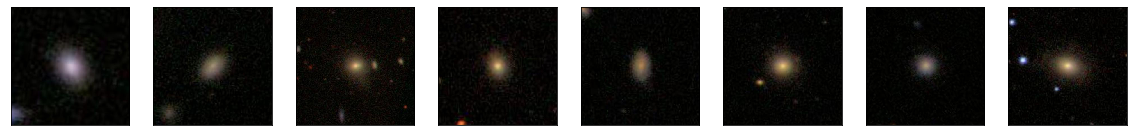

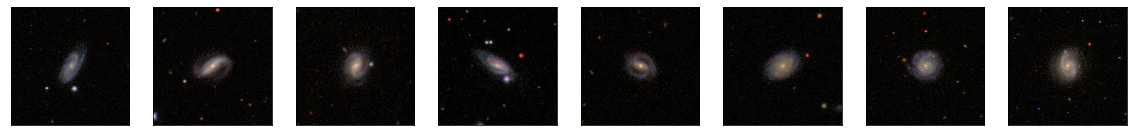

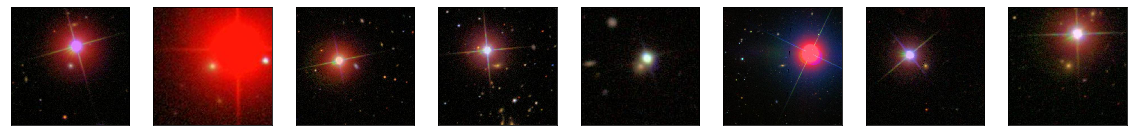

In [8]:
images_class11 = buildim(f1,8) 
buildim(f2,8) 
buildim(f3,8)

In [29]:
class1 = train[['GalaxyID','Class1.1', 'Class1.2','Class1.3']]
class11 = train[['GalaxyID','Class1.1']].sort_values(ascending=False, by=['Class1.1']).head(100)
class12 = train[['GalaxyID','Class1.2']].sort_values(ascending=False, by=['Class1.2']).head(100)
class13 = train[['GalaxyID','Class1.3']].sort_values(ascending=False, by=['Class1.3']).head(100)

In [30]:
class11_df = pd.DataFrame(class11)
class12_df = pd.DataFrame(class12)
class13_df = pd.DataFrame(class13)

In [31]:
import os
if not os.path.exists('./galaxy_zoo/images_training_rev1/sample_class_1'):
    os.makedirs('./galaxy_zoo/images_training_rev1/sample_class_1')
if not os.path.exists('./galaxy_zoo/images_training_rev1/sample_class_2'):
    os.makedirs('./galaxy_zoo/images_training_rev1/sample_class_2')
if not os.path.exists('./galaxy_zoo/images_training_rev1/sample_class_3'):
    os.makedirs('./galaxy_zoo/images_training_rev1/sample_class_3')
if not os.path.exists('./galaxy_zoo/images_training_rev1/all_class_1'):
    os.makedirs('./galaxy_zoo/images_training_rev1/all_class_1')

In [32]:
import shutil
for row in class1['GalaxyID']:
    path_img = f"./galaxy-zoo-data/images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './galaxy_zoo/images_training_rev1/all_class_1')

In [21]:
for row in class11_df['GalaxyID']:
    path_img = f"./galaxy-zoo-data/images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './galaxy_zoo/images_training_rev1/sample_class_1')

In [22]:
for row in class12_df['GalaxyID']:
    path_img = f"./galaxy-zoo-data/images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './galaxy_zoo/images_training_rev1/sample_class_2')

In [23]:
for row in class13_df['GalaxyID']:
    path_img = f"./galaxy-zoo-data/images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './galaxy_zoo/images_training_rev1/sample_class_3')

In [33]:
class1_df = pd.DataFrame(class1)

In [34]:
class1_df.to_csv('class1_df.csv', index = False)